# **Predicting Monetary Damage Caused by Property Fires (NFIRS Data)**




## Problem Statement
The objective of this project is to predict the 'PROP_LOSS' from fires that have occurred in homes and businesses around the USA. The dataset has about 2 Million rows.

------------------------------


## Data Dictionary

* https://www.usfa.fema.gov/downloads/pdf/nfirs/NFIRS_Spec_2015.pdf





# Importing the Required Modules

In [245]:
# Modules needed for EDA & Wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modules required for Splitting & Normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

# Modules needed for Regression Modeling 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Regression Error Metrics - Scikit-learn
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Regression Error Metrics 
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.eval_measures import meanabs

# Tests/Statistics required for Validating Assumptions
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ridge
from sklearn.linear_model import Ridge,RidgeCV

# Lasso
from sklearn.linear_model import Lasso,LassoCV

## Reading the data from Google Drive 

* https://drive.google.com/file/d/1MxgmttUPTvDp9jns1VtAe978d0iiYiXT/view?usp=sharing

In [246]:
# Mounting the Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [247]:
# Importing the Dataset

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NFIRS2014.csv',index_col=0)
df.info()

<ipython-input-247-96b766d5ea67>:3: DtypeWarning:

Columns (2,4,6,14,15,16,17,18,19,37,40) have mixed types. Specify dtype option on import or set low_memory=False.



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116746 entries, 1 to 2116746
Data columns (total 40 columns):
 #   Column     Dtype  
---  ------     -----  
 0   STATE      object 
 1   FDID       object 
 2   INC_DATE   object 
 3   INC_NO     object 
 4   EXP_NO     int64  
 5   DEPT_STA   object 
 6   INC_TYPE   int64  
 7   ADD_WILD   object 
 8   AID        object 
 9   ALARM      object 
 10  ARRIVAL    object 
 11  INC_CONT   float64
 12  LU_CLEAR   object 
 13  SHIFT      object 
 14  ALARMS     object 
 15  DISTRICT   object 
 16  ACT_TAK1   object 
 17  ACT_TAK2   object 
 18  ACT_TAK3   object 
 19  APP_MOD    object 
 20  SUP_APP    int64  
 21  EMS_APP    int64  
 22  OTH_APP    int64  
 23  SUP_PER    int64  
 24  EMS_PER    int64  
 25  OTH_PER    int64  
 26  RESOU_AID  object 
 27  PROP_LOSS  float64
 28  CONT_LOSS  float64
 29  PROP_VAL   float64
 30  CONT_VAL   float64
 31  FF_DEATH   float64
 32  OTH_DEATH  float64
 33  FF_INJ     float64
 34  OTH_INJ    float64

In [248]:
# Look at the first 10 rows
df.head(n=10)

,STATE,FDID,INC_DATE,INC_NO,EXP_NO,DEPT_STA,INC_TYPE,ADD_WILD,AID,ALARM,...,CONT_VAL,FF_DEATH,OTH_DEATH,FF_INJ,OTH_INJ,DET_ALERT,HAZ_REL,MIXED_USE,PROP_USE,CENSUS
1,AK,11100,2014-01-02,222,0,3,463,N,N,2014-01-02 17:20:00,...,NaN,0.0,NaN,0.0,NaN,NaN,N,00,961,NaN
2,AK,11100,2014-01-05,598,0,3,561,N,N,2014-01-05 14:30:00,...,NaN,0.0,NaN,0.0,NaN,NaN,N,NN,900,NaN
3,AK,11100,2014-01-09,1030,0,3,114,N,N,2014-01-09 13:50:00,...,NaN,0.0,NaN,0.0,NaN,U,N,NN,419,NaN
4,AK,11100,2014-01-10,1212,0,3,561,N,N,2014-01-10 20:34:00,...,NaN,0.0,NaN,0.0,NaN,NaN,N,NN,419,NaN
5,AK,11100,2014-01-11,1280,0,3,138,N,N,2014-01-11 11:48:00,...,0.0,0.0,NaN,0.0,NaN,NaN,N,60,919,NaN
6,AK,11100,2014-01-12,1392,0,3,142,N,N,2014-01-12 09:53:00,...,20000.0,0.0,NaN,0.0,NaN,NaN,N,NN,669,NaN
7,AK,11100,2014-01-13,1559,0,3,561,N,N,2014-01-13 14:26:00,...,NaN,0.0,NaN,0.0,NaN,NaN,N,NN,938,NaN
8,AK,11100,2014-01-13,1564,0,3,561,N,N,2014-01-13 14:44:00,...,NaN,0.0,NaN,0.0,NaN,NaN,N,60,938,NaN
9,AK,11100,2014-01-16,1943,0,3,411,N,N,2014-01-16 13:38:00,...,NaN,0.0,NaN,0.0,NaN,NaN,N,NN,974,NaN
10,AK,11100,2014-01-17,2129,0,1,113,N,N,2014-01-17 18:43:00,...,NaN,0.0,NaN,0.0,NaN,2,N,NN,429,NaN


## EDA: Counting the number of missing observations per column

In [249]:
# Number of Missing Observations

print("Number of Missing Observations Per Column\n")
df.isna().sum()


Number of Missing Observations Per Column



STATE            329
FDID               0
INC_DATE           0
INC_NO             0
EXP_NO             0
DEPT_STA      557513
INC_TYPE           0
ADD_WILD           0
AID                0
ALARM              0
ARRIVAL            0
INC_CONT     1612496
LU_CLEAR         114
SHIFT         864553
ALARMS        755315
DISTRICT      893634
ACT_TAK1           3
ACT_TAK2     1437009
ACT_TAK3     1858837
APP_MOD            0
SUP_APP            0
EMS_APP            0
OTH_APP            0
SUP_PER            0
EMS_PER            0
OTH_PER            0
RESOU_AID          0
PROP_LOSS     950366
CONT_LOSS     963294
PROP_VAL     1277801
CONT_VAL     1305971
FF_DEATH       26499
OTH_DEATH    2108003
FF_INJ         26499
OTH_INJ      2108003
DET_ALERT    1468020
HAZ_REL      1606682
MIXED_USE    1754158
PROP_USE      174726
CENSUS       1739681
dtype: int64

## EDA: Which month had the most fires? Which MM/DD/YY had the most fires?

* **Since we will be counting the number of fires, we would be considering the incidents with incident_type values between 100 & 173 (as per the data dictionary).**

In [250]:
# Creating a Subset of Dataset for Incident Type 'Fire' 

df_fire=df[(df['INC_TYPE']>=100) & (df['INC_TYPE']<=173)]
print(df_fire.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096493 entries, 3 to 2116743
Data columns (total 40 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   STATE      1096218 non-null  object 
 1   FDID       1096493 non-null  object 
 2   INC_DATE   1096493 non-null  object 
 3   INC_NO     1096493 non-null  object 
 4   EXP_NO     1096493 non-null  int64  
 5   DEPT_STA   794999 non-null   object 
 6   INC_TYPE   1096493 non-null  int64  
 7   ADD_WILD   1096493 non-null  object 
 8   AID        1096493 non-null  object 
 9   ALARM      1096493 non-null  object 
 10  ARRIVAL    1096493 non-null  object 
 11  INC_CONT   344098 non-null   float64
 12  LU_CLEAR   1096381 non-null  object 
 13  SHIFT      596006 non-null   object 
 14  ALARMS     664982 non-null   object 
 15  DISTRICT   602587 non-null   object 
 16  ACT_TAK1   1096491 non-null  object 
 17  ACT_TAK2   370228 non-null   object 
 18  ACT_TAK3   150376 non-null   object 
 19  

In [251]:
# Extracting month from the variable 'INC_DATE'

month = pd.to_datetime(df_fire['INC_DATE']).dt.month

In [252]:
# Month that had the Most Fires

print("\nNumber of Fires Month Wise in Descending Order : \n")

print(month.value_counts())

# We can see that Month '3' i.e. March had the most number of Fires.


Number of Fires Month Wise in Descending Order : 

3     116588
4     115041
1     111568
7      96657
5      95708
11     90109
2      85989
6      82657
8      81614
10     74988
9      73016
12     72558
Name: INC_DATE, dtype: int64


### **We can see that Month '3' i.e. March had the most number of Fires.**

In [253]:
# Extracting date from the variable 'INC_DATE'

date = pd.to_datetime(df_fire['INC_DATE']).dt.date

In [254]:
# MM/DD/YY that had the Most Fires

print("\nNumber of Fires Date Wise in Descending Order :\n")

print(date.value_counts())

# We can see that 07/04/2014 i.e, 04th July 2014 had the most fires.


Number of Fires Date Wise in Descending Order :

2014-07-04    6968
2014-03-15    6143
2014-04-12    5839
2014-07-05    5613
2014-04-11    5333
              ... 
2014-10-16    2046
2014-12-28    2043
2014-10-14    2037
2014-12-27    1980
2014-12-23    1922
Name: INC_DATE, Length: 365, dtype: int64


### **We can see that 07/04/2014 i.e, 04th July 2014 had the most fires.**

## EDA: Which state had the most property loss (`df['PROP_LOSS']`)


In [255]:
print("\nProperty Loss By State:\n")
print(df.groupby('STATE').PROP_LOSS.sum('PROP_LOSS').sort_values(ascending=False))

# California (CA) had the Most Property Loss.


Property Loss By State:

STATE
CA    839716885.0
TX    517798452.0
KY    497602050.0
FL    399988908.0
MI    385733330.0
IL    315622451.0
GA    286015916.0
OH    249603029.0
TN    206991064.0
WI    200223314.0
MA    200183589.0
WA    193980269.0
VA    187532875.0
NC    183656059.0
MN    170988037.0
AR    141774637.0
LA    139933855.0
SC    131919327.0
MS    130466925.0
MD    129775967.0
PA    114432744.0
IA    107669696.0
OR     99534936.0
MO     97007887.0
OK     96187504.0
NY     91536732.0
CT     90702164.0
NJ     90188742.0
KS     85692832.0
WV     84619213.0
NM     59686091.0
AZ     58583790.0
AL     57052431.0
CO     56018342.0
AK     52470529.0
UT     36039167.0
ID     31145057.0
NE     30347577.0
MT     29537161.0
ME     29032039.0
ND     24564192.0
NH     24334552.0
NV     23329260.0
HI     19645221.0
VT     17138357.0
IN     15440681.0
SD     14211795.0
RI     12657936.0
WY      6306986.0
DE      5889224.0
DC      1987530.0
Name: PROP_LOSS, dtype: float64


### **California (CA) had the Most Property Loss.**

## EDA: Keeping rows where `df['PROP_LOSS`]` is greater than 1000. 


In [256]:
df=df[df['PROP_LOSS']>1000]
print("\nNumber of Rows after discarding rows with Property Loss less than 1000: " ,df.shape[0])


Number of Rows after discarding rows with Property Loss less than 1000:  169362


### **Number of Rows after discarding rows with Property Loss less than 1000 is 169362 rows.**

### **Summary Statistics for df['PROP_LOSS'] column :**

In [257]:
print("\nSummary Statistics for df['PROP_LOSS'] column :\n")
df['PROP_LOSS'].describe()


Summary Statistics for df['PROP_LOSS'] column :



count    1.693620e+05
mean     4.151527e+04
std      1.107988e+06
min      1.001000e+03
25%      3.500000e+03
50%      8.987500e+03
75%      2.500000e+04
max      4.000000e+08
Name: PROP_LOSS, dtype: float64

## EDA: Keeping rows where `df['PROP_VAL`]` is greater than 1000. 


In [258]:
df=df[df['PROP_VAL']>1000]
print("\nNumber of Rows after discarding rows with Property Value less than 1000: " ,df.shape[0])


Number of Rows after discarding rows with Property Value less than 1000:  122729


### **Number of Rows after discarding rows with Property Value less than 1000 is 122729 rows.**

## EDA: Converting `df['CENSUS']` column to numeric and coercing the errors.


In [259]:
df['CENSUS'] = pd.to_numeric(df['CENSUS'], errors='coerce')
print("Shape of the Dataframe :")
print(df.shape)

Shape of the Dataframe :
(122729, 40)


<ipython-input-259-32d3c52d2c72>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## EDA: Keeping rows wherein `df['CENSUS`] is greater than 0.


In [260]:
df=df[df['CENSUS']>0]
print("\nNumber of Rows after discarding rows where Census is not greater than 0: " ,df.shape[0])


Number of Rows after discarding rows where Census is not greater than 0:  22351


### **Number of Rows after discarding rows where Census is not greater than 0 is 22351 rows.**

## EDA: Scatterplot of `x='PROP_VAL'` and `y='PROP_LOSS'`. 


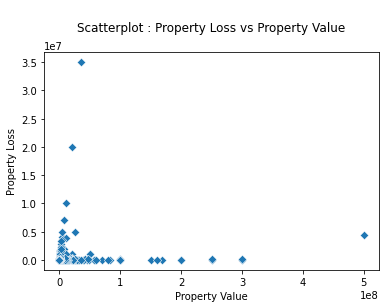

In [261]:
plt.title("\nScatterplot : Property Loss vs Property Value\n")
sns.scatterplot(x='PROP_VAL',y='PROP_LOSS',marker='D',data=df)
plt.xlabel("Property Value")
plt.ylabel("Property Loss")
plt.show()

* We can see from the above plot that there is no strong correlation between the target variable 'PROP_LOSS' & the predictor variable 'PROP_VAL' , i.e. 'PROP_LOSS' is not directly correlated to the predictor 'PROP_VAL'

* There might be situations when only a part of the Property is affected.In such cases, Property Loss is much much smaller than the Property Value.

* Also,there might be situations when the entire property is damaged.In such cases, the Property Loss might equal the Property Value.

* Since we have two different extreme cases, we have few outliers in the dataset as seen on the plot.

### Plot for Number of Fire Fighters Injured Per State

In [262]:
# Number of Fire Fighters Injured Per State

print(df.groupby('STATE').FF_INJ.sum().sort_values(ascending=False))

states=["OH","IL","MA","FL","TX","KY","MI","PA","GA","LA","VA","WV","NY","CA","SC","WI","NJ","NC","NH","MO","IA","WA","HI","CT","MN","TN","RI","UT","OR","ND","AK","MD","CO","NM","NV","KS","MS","OK","ME","IN","ID","AR","AL","MT","DE","NE","VT","AZ","SD","WY"]

n_inj=[136,111,110,57,37,34,31,27,27,27,23,19,17,16,15,13,12,11,11,10,8,8,7,7,7,5,5,5,5,5,4,3,3,2,2,2,2,2,1,1,1,1,0,0,0,0,0,0,0,0]

a={'States':states,"N_Injured":n_inj}
df_plot=pd.DataFrame(a)

STATE
OH    136.0
IL    111.0
MA    110.0
FL     57.0
TX     37.0
KY     34.0
MI     31.0
PA     27.0
GA     27.0
LA     27.0
VA     23.0
WV     19.0
NY     17.0
CA     16.0
SC     15.0
WI     13.0
NJ     12.0
NC     11.0
NH     11.0
MO     10.0
IA      8.0
WA      8.0
HI      7.0
CT      7.0
MN      7.0
TN      5.0
RI      5.0
UT      5.0
OR      5.0
ND      5.0
AK      4.0
MD      3.0
CO      3.0
NM      2.0
NV      2.0
KS      2.0
MS      2.0
OK      2.0
ME      1.0
IN      1.0
ID      1.0
AR      1.0
AL      0.0
MT      0.0
DE      0.0
NE      0.0
VT      0.0
AZ      0.0
SD      0.0
Name: FF_INJ, dtype: float64


In [263]:
import plotly.express as px

fig = px.choropleth(df_plot,
                    locations='States', 
                    locationmode="USA-states", 
                    color='N_Injured',
                    color_continuous_scale="Viridis_r", 
                    scope="usa",
                    title="Number of Fire Fighters Injured Per State (USA)",
                    labels={'N_Injured':'Number of Fire Fighters Injured'}
                    ) 

fig.show()

#### **We have plotted the number of fire fighters injured per state using the 'plotly' package.**

#### **From the plot, we can see that the States like Illinois (IL), Ohio (OH) & Massachusetts (MA) have the highest number of injuries.**

#### **Therefore, we can say that the incidents that occur in these states have proven to be more dangerous when compared to other bigger states like California(CA) & New York (NY).** 


### Pivot Table showing the statewise Total Property Loss for each type of Property Use

In [264]:
# Creating the DataFrame 

df_table=df[['STATE','PROP_USE','PROP_LOSS']].copy()
df_table['PROP_USE']=df_table['PROP_USE'].apply(pd.to_numeric, errors = 'coerce')
df_table=df_table.dropna()


# Recoding the Variable 'Property Use'

def my_recode(prop_use):
    if (prop_use>=100) & (prop_use<200):
        return "Assembly"
    if (prop_use>=200) & (prop_use<300):
        return "Educational"
    elif (prop_use>=300) & (prop_use<400):
        return "Healthcare"
    elif (prop_use>=400) & (prop_use<500):
        return "Residential"
    elif (prop_use>=500) & (prop_use<600):
        return "Business"
    elif (prop_use>=600) & (prop_use<700):
        return "Agriculture"
    elif (prop_use>=700) & (prop_use<800):
        return "Manufacturing"
    elif (prop_use>=800) & (prop_use<900):
        return "Storage"    
    else:
        return "Outside"                    

df_table['PROP_USE']=df_table['PROP_USE'].apply(my_recode)
df_table.head()

,STATE,PROP_USE,PROP_LOSS
772,AK,Outside,4000.0
773,AK,Outside,2000.0
3150,AK,Residential,2000.0
4188,AK,Outside,8000.0
4197,AK,Business,5000.0


In [265]:
# Creating the Pivot Table

pvt_table=pd.pivot_table(df_table,index='STATE',values='PROP_LOSS',columns=['PROP_USE'],aggfunc=np.sum,margins=True,margins_name='Total').fillna(0)

print("Pivot Table Showing the Property Loss Per State Based on the Property Use")
pvt_table

Pivot Table Showing the Property Loss Per State Based on the Property Use


PROP_USE,Agriculture,Assembly,Business,Educational,Healthcare,Manufacturing,Outside,Residential,Storage,Total
STATE,,,,,,,,,,
AK,0.0,25000.0,1672622.0,0.0,0.0,0.0,229825.0,1547279.0,9500.0,3484226.0
AL,0.0,95000.0,362000.0,0.0,0.0,0.0,330000.0,718700.0,0.0,1505700.0
AR,0.0,0.0,40363.0,0.0,1059000.0,37000.0,526400.0,1009650.0,16000.0,2688413.0
AZ,3000.0,1232500.0,71023.0,0.0,36000.0,190000.0,134000.0,1098764.0,2000.0,2767287.0
CA,104000.0,1404000.0,5302600.0,1505000.0,765500.0,437000.0,6234985.0,26432707.0,1183500.0,43369292.0
CO,0.0,5000.0,24300.0,30000.0,0.0,12000.0,19650.0,317300.0,1000000.0,1408250.0
CT,35000000.0,38000.0,947750.0,14500.0,2000.0,2000.0,2403100.0,2454000.0,357000.0,41218350.0
DE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,0.0,1000000.0
FL,9684787.0,2525406.0,4602613.0,777290.0,118800.0,1387000.0,26048912.0,53331117.0,4084794.0,102560719.0


In [266]:
# Changing Pivot Table into a DataFrame
df_pivot=pd.DataFrame(pvt_table)

In [267]:
df_pivot.head()

PROP_USE,Agriculture,Assembly,Business,Educational,Healthcare,Manufacturing,Outside,Residential,Storage,Total
STATE,,,,,,,,,,
AK,0.0,25000.0,1672622.0,0.0,0.0,0.0,229825.0,1547279.0,9500.0,3484226.0
AL,0.0,95000.0,362000.0,0.0,0.0,0.0,330000.0,718700.0,0.0,1505700.0
AR,0.0,0.0,40363.0,0.0,1059000.0,37000.0,526400.0,1009650.0,16000.0,2688413.0
AZ,3000.0,1232500.0,71023.0,0.0,36000.0,190000.0,134000.0,1098764.0,2000.0,2767287.0
CA,104000.0,1404000.0,5302600.0,1505000.0,765500.0,437000.0,6234985.0,26432707.0,1183500.0,43369292.0


In [268]:
df_pivot.sort_values(by=['Total'],inplace=True,ascending=False)

In [269]:
df_pivot.head(n=6)

PROP_USE,Agriculture,Assembly,Business,Educational,Healthcare,Manufacturing,Outside,Residential,Storage,Total
STATE,,,,,,,,,,
Total,59921490.0,31932314.0,57184854.0,4509123.0,4188158.0,16195962.0,110705640.0,462200793.0,32277082.0,779115416.0
FL,9684787.0,2525406.0,4602613.0,777290.0,118800.0,1387000.0,26048912.0,53331117.0,4084794.0,102560719.0
IL,715000.0,3227250.0,7769378.0,70683.0,117500.0,4341500.0,8636913.0,51569539.0,3534311.0,79982074.0
TX,8500.0,2394499.0,2867499.0,304700.0,72000.0,302000.0,10122123.0,50416802.0,4319356.0,70807479.0
GA,5346500.0,1280205.0,4342400.0,194000.0,2500.0,4720000.0,6207294.0,39920266.0,1474270.0,63487435.0
OH,1526000.0,7108369.0,3031695.0,433500.0,50500.0,675000.0,5281405.0,27734345.0,2658315.0,48499129.0


#### **We have created a Pivot Table showing the statewise Total Property Loss (in dollars) for each type of Property Use.**

#### **From the table , we can see that the largest losses were attributed to the property type/use categorized as "Residential" , followed by the property type categorized as "Outside" for the top 5 states with the highest property loss.**

## EDA: Counting the number of fires (rows) per State in clean dataset.
What are the top five States that had fires?


* **Since we will be counting the number of fires,, we would be considering the incidents with incident_type values between 100 & 173 (as per the data dictionary).**

In [270]:
# Creating a Subset of Dataset for Incident Type 'Fire' 

df_fire_clean=df[(df['INC_TYPE']>=100) & (df['INC_TYPE']<=173)]
print(df_fire_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22130 entries, 772 to 2113877
Data columns (total 40 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATE      22126 non-null  object 
 1   FDID       22130 non-null  object 
 2   INC_DATE   22130 non-null  object 
 3   INC_NO     22130 non-null  object 
 4   EXP_NO     22130 non-null  int64  
 5   DEPT_STA   19852 non-null  object 
 6   INC_TYPE   22130 non-null  int64  
 7   ADD_WILD   22130 non-null  object 
 8   AID        22130 non-null  object 
 9   ALARM      22130 non-null  object 
 10  ARRIVAL    22130 non-null  object 
 11  INC_CONT   7199 non-null   float64
 12  LU_CLEAR   22130 non-null  object 
 13  SHIFT      20468 non-null  object 
 14  ALARMS     18635 non-null  object 
 15  DISTRICT   18830 non-null  object 
 16  ACT_TAK1   22130 non-null  object 
 17  ACT_TAK2   13024 non-null  object 
 18  ACT_TAK3   7720 non-null   object 
 19  APP_MOD    22130 non-null  object 
 20  SU

In [271]:
# Number of Fires Per State

print("\nNumber of Fires Per State :\n")
print(df_fire_clean['STATE'].value_counts())

# The Top Five States that had Fires are : Florida (FL), Illinois (IL), Ohio (OH) , Texas (TX) & Georgia (GA). 


Number of Fires Per State :

FL    3005
IL    2558
OH    2021
TX    1760
GA    1599
MI    1240
CA    1182
VA     967
MA     955
PA     717
LA     570
KY     557
NC     546
OR     433
HI     360
WV     360
WI     332
SC     310
MO     242
WA     234
TN     204
IA     182
CT     166
NJ     161
MN     127
OK     118
NH     107
AR     106
KS     100
RI      98
MS      96
NY      87
AZ      83
UT      74
AK      72
MD      69
ID      65
AL      54
IN      47
ND      37
NV      35
ME      34
CO      28
NE      10
MT       6
SD       5
NM       4
VT       2
DE       1
Name: STATE, dtype: int64


#### ***The Top Five States that had Fires are : Florida (FL), Illinois (IL), Ohio (OH) , Texas (TX) & Georgia (GA). ***

## **Description of Columns**

* **'INC_TYPE'** : This column represents the actual situation or the type of incident that the emergency personnel found on the scene when they arrived. This critical information helps to identify the various types of incidents to which the fire department responds & allows the fire department to document the full range of incidents it handles.For example , the incidents with INC_TYPE starting with '1' represents 'Fire', those with INC_TYPE starting with '2' represents 'Overpressure Rupture/Explosion/Overheat' , those with INC_TYPE starting with '3' represents 'Rescue and Emergency Medical Service Incident' , & so on and so forth.


* **'ALARMS'** : This columns represents the actual number of alarms transmitted for the incident.  An alarm's definition is decided at the local level. One way to gauge the seriousness of an occurrence is the number of alarms. The number of alarms can be important information for analyzing local resource needs. The frequency of alarms could also be related to mutual aid support.


* **'ACT_TAK1'** : This column represents the type of action taken. This could include the tasks carried out at the scene of the incident by the responding fire department staff such as extinguishing fires, forcible entry,  providing first-aid , & so on and so forth.


* **'SUP_APP'** : This column represents the number of Suppression Apparatus used at the scene of the incident.A fire suppression system or apparatus, such a fire sprinkler system, is used to put out or control fire & it is activated by heat, smoke, or a combination of these two.A fire suppression system doesn't use water to put out the flames; instead, it uses gaseous, chemical, or foam fire suppression agents.


* **'EMS_APP'** : This column represents the number of 'Emergency Medical Services' apparatus used at the scene of the incident.The Emergency Medical Technicians (EMTs) will always have a stethoscope, thermometers, and a sphygmomanometer to check the patient's blood pressure. EMTs also have plenty of grasping tools, such as tweezers and forceps, as well as tools to help them see better, such as magnifiers and penlights.


* **'OTH_APP'** : This column represents the number of other apparatus sent to the incident. This could include marine equipments,heavy ground equipments, support equipments & so on and so forth.


* **'PROP_LOSS'** : This column represents the Property Loss in dollars.This includes a dollar estimate of the the total property loss caused by the incident. 'PROP_LOSS' is the target variable.


* **'PROP_VAL'** : This column represents the Property Value in dollars.This includes a dollar estimate of the total pre-incident property value (replacement cost).


* **'CONT_VAL'** : This column represents the Contents Value in dollars.
This includes a dollar estimate of the total pre-incident contents value(replacement cost).


* **'FF_DEATH'** : This column represents the number of Fire Fighters died as a result of the incident.


* **'FF_INJ'** : This column represents the number of Fire Fighters injured as a result of the incident.


* **'PROP_USE'** : This column represents 'Property Use'.Property Use refers to the actual use of the property where the incident took place, not the combined or overall use of the properties that the property is a part of.For example , Property Use with 'PROP_USE' value starting with '4' represents Residential Use, Property Use with 'PROP_USE' value starting with '8' represents Storage Use, Property Use with 'PROP_USE' value starting with '9' represents Outside or Special Property, & so on and so forth.




#### **Creating a Subset with Numeric Columns**


In [272]:
# Creating a Subset with Numeric Columns

df_sub=df[['INC_TYPE','ALARMS','ACT_TAK1','SUP_APP','EMS_APP','OTH_APP','PROP_LOSS','PROP_VAL','CONT_VAL','FF_DEATH','FF_INJ','PROP_USE']]

In [273]:
df_sub.tail(n=10)

,INC_TYPE,ALARMS,ACT_TAK1,SUP_APP,EMS_APP,OTH_APP,PROP_LOSS,PROP_VAL,CONT_VAL,FF_DEATH,FF_INJ,PROP_USE
2113590,111,1.0,11,3,0,2,5000.0,65000.0,15000.0,0.0,0.0,419
2113614,463,1.0,86,1,0,0,10000.0,70000.0,0.0,0.0,0.0,965
2113643,111,1.0,11,6,0,4,45000.0,45000.0,5000.0,0.0,1.0,419
2113689,111,1.0,11,10,0,0,45000.0,75000.0,25000.0,0.0,0.0,419
2113716,111,1.0,11,4,0,3,2000.0,2000.0,200.0,0.0,0.0,808
2113805,111,1.0,21,5,0,2,17500.0,17500.0,2500.0,0.0,0.0,429
2113851,111,1.0,11,6,0,2,30000.0,30000.0,0.0,0.0,2.0,419
2113864,111,1.0,11,6,1,2,10000.0,45000.0,10000.0,0.0,0.0,419
2113866,111,1.0,11,5,0,3,30000.0,50000.0,5000.0,0.0,0.0,419
2113877,111,1.0,11,4,0,2,5000.0,90000.0,0.0,0.0,0.0,419


In [274]:
# Summary of Subset

df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22351 entries, 772 to 2113877
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   INC_TYPE   22351 non-null  int64  
 1   ALARMS     18834 non-null  object 
 2   ACT_TAK1   22351 non-null  object 
 3   SUP_APP    22351 non-null  int64  
 4   EMS_APP    22351 non-null  int64  
 5   OTH_APP    22351 non-null  int64  
 6   PROP_LOSS  22351 non-null  float64
 7   PROP_VAL   22351 non-null  float64
 8   CONT_VAL   19607 non-null  float64
 9   FF_DEATH   22350 non-null  float64
 10  FF_INJ     22350 non-null  float64
 11  PROP_USE   22348 non-null  object 
dtypes: float64(5), int64(4), object(3)
memory usage: 2.2+ MB


## Data prep: Converting all columns to numeric and using errors='coerce'.


In [275]:
# Converting all Columns to Numeric

df_sub.iloc[:,:]=df_sub.iloc[:,:].apply(pd.to_numeric, errors = 'coerce')

<ipython-input-275-05fc2f4c492f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [276]:
# Printing the Datatypes
df_sub.dtypes

INC_TYPE       int64
ALARMS       float64
ACT_TAK1     float64
SUP_APP        int64
EMS_APP        int64
OTH_APP        int64
PROP_LOSS    float64
PROP_VAL     float64
CONT_VAL     float64
FF_DEATH     float64
FF_INJ       float64
PROP_USE     float64
dtype: object

## Data Prep: Dropping NA rows 


In [277]:
df_final=df_sub.dropna()

# We have dropped the missing values instead of imputation in order to maintain the integrity of the data.

#### We have dropped the missing values instead of imputation in order to maintain the integrity of the data.

In [278]:
print("\nSummary :\n")
print(df_final.info())

print("\n\n")
print("Cleaned Dataset\n")
print(df_final.head())



Summary :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16371 entries, 4197 to 2113877
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   INC_TYPE   16371 non-null  int64  
 1   ALARMS     16371 non-null  float64
 2   ACT_TAK1   16371 non-null  float64
 3   SUP_APP    16371 non-null  int64  
 4   EMS_APP    16371 non-null  int64  
 5   OTH_APP    16371 non-null  int64  
 6   PROP_LOSS  16371 non-null  float64
 7   PROP_VAL   16371 non-null  float64
 8   CONT_VAL   16371 non-null  float64
 9   FF_DEATH   16371 non-null  float64
 10  FF_INJ     16371 non-null  float64
 11  PROP_USE   16371 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 1.6 MB
None



Cleaned Dataset

      INC_TYPE  ALARMS  ACT_TAK1  SUP_APP  EMS_APP  OTH_APP  PROP_LOSS  \
4197       131     1.0      10.0        1        0        0     5000.0   
4198       131     1.0      11.0        1        0        0    12000.0   
4199       111   

## Modeling: Defining $X$ and $y$
`y = 'PROP_LOSS'`

`X = all other columns!`

In [279]:
y=np.log(df_final['PROP_LOSS'])

In [280]:
X=df_final.drop(['PROP_LOSS'],axis=1)

# Distribution of Predictor Variables

[]

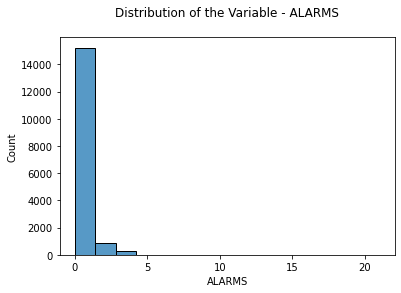

In [281]:
# Histogram for ALARMS

sns.histplot(df_final['ALARMS'])
plt.title("Distribution of the Variable - ALARMS\n")
plt.plot()


[]

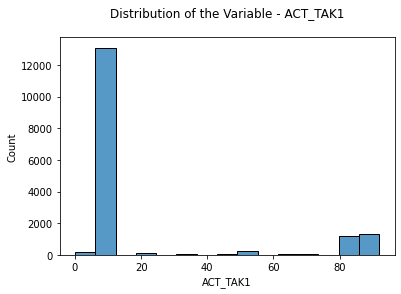

In [282]:
# Histogram for ACT_TAK1

sns.histplot(df_final['ACT_TAK1'])
plt.title("Distribution of the Variable - ACT_TAK1\n")
plt.plot()

[]

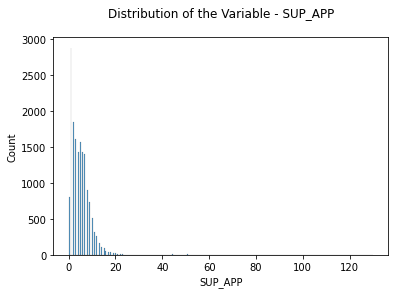

In [283]:
# Histogram for SUP_APP

sns.histplot(df_final['SUP_APP'])
plt.title("Distribution of the Variable - SUP_APP\n")
plt.plot()

[]

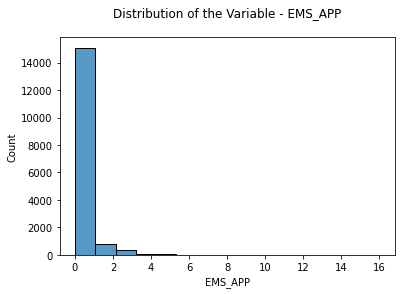

In [284]:
# Histogram for EMS_APP

sns.histplot(df_final['EMS_APP'])
plt.title("Distribution of the Variable - EMS_APP\n")
plt.plot()

[]

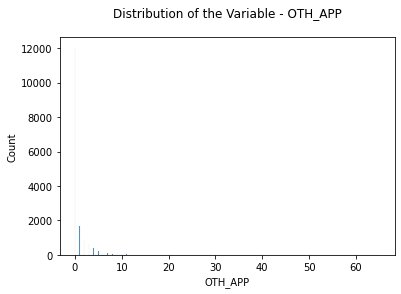

In [285]:
# Histogram for OTH_APP

sns.histplot(df_final['OTH_APP'])
plt.title("Distribution of the Variable - OTH_APP\n")
plt.plot()

[]

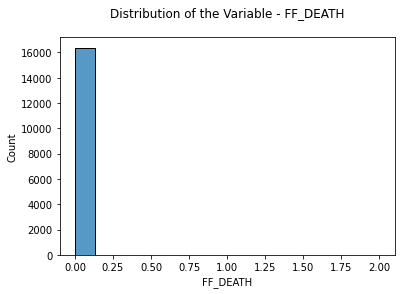

In [286]:
# Histogram for FF_DEATH

sns.histplot(df_final['FF_DEATH'])
plt.title("Distribution of the Variable - FF_DEATH\n")
plt.plot()

[]

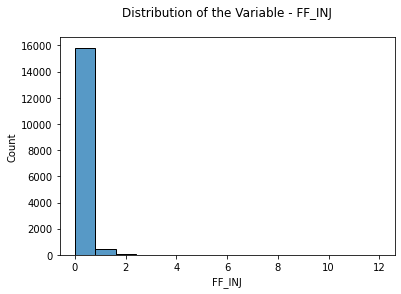

In [287]:
# Histogram for FF_INJ

sns.histplot(df_final['FF_INJ'])
plt.title("Distribution of the Variable - FF_INJ\n")
plt.plot()

* From the above histograms , we can see that the predictors do not have a Normal Distribution.

* Hence , we would be transforming the distribution of the predictor variables to improve the predictive power of the models.

## Modeling: Splitting data using an 80/20 random split. 

In [288]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=63)

In [289]:
# Shapes of Training & Test Sets

print("Shape of X_train:",X_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test :",y_test.shape)

Shape of X_train: (13096, 11)
Shape of X_test : (3275, 11)
Shape of y_train: (13096,)
Shape of y_test : (3275,)


In [290]:
# Dropping Categorical Variables Before Standardizing & Transforming

X_train_temp=X_train.drop(['INC_TYPE','ACT_TAK1','PROP_USE'],axis=1)
X_test_temp=X_test.drop(['INC_TYPE','ACT_TAK1','PROP_USE'],axis=1)
train_names=X_train_temp.columns[0:]
test_names=X_test_temp.columns[0:]

# Standardizing the Variables

In [291]:
# Standardizing the Variables

scaler=MinMaxScaler()
X_train_temp=scaler.fit_transform(X_train_temp)
X_test_temp=scaler.transform(X_test_temp)

# Transforming the Distribution of the Variables

* We have used Power Transformer to transform the distribution of the predictor variables to improve the predictive power of the models.

In [292]:
# Transforming the Distribution of the Variables

power = PowerTransformer(method='yeo-johnson')
X_train_temp=power.fit_transform(X_train_temp)
X_test_temp=power.transform(X_test_temp)

In [293]:
X_train_temp=pd.DataFrame(X_train_temp,columns=train_names)
X_test_temp=pd.DataFrame(X_test_temp,columns=test_names) 

In [294]:
# Adding Categorical Variables back for Modeling

X_train_temp[['INC_TYPE','ACT_TAK1','PROP_USE']]=X_train[['INC_TYPE','ACT_TAK1','PROP_USE']].to_numpy()
X_test_temp[['INC_TYPE','ACT_TAK1','PROP_USE']]=X_test[['INC_TYPE','ACT_TAK1','PROP_USE']].to_numpy()

In [295]:
X_train=X_train_temp.copy()
X_test=X_test_temp.copy()

In [296]:
X_train.head()

,ALARMS,SUP_APP,EMS_APP,OTH_APP,PROP_VAL,CONT_VAL,FF_DEATH,FF_INJ,INC_TYPE,ACT_TAK1,PROP_USE
0,0.256762,1.635870,-0.490153,-0.586133,3.594542,-0.151283,-0.015137,-0.187986,111.0,11.0,429.0
1,0.256762,-0.386420,2.132363,2.072473,0.714561,0.617529,-0.015137,-0.187986,111.0,11.0,419.0
2,0.256762,-0.776599,-0.490153,-0.586133,-0.672467,-0.522769,-0.015137,-0.187986,131.0,11.0,965.0
3,-1.809723,0.536343,-0.490153,-0.586133,-0.117583,-0.522769,-0.015137,-0.187986,132.0,11.0,965.0
4,0.256762,1.501480,-0.490153,-0.586133,-0.252813,-0.091948,-0.015137,-0.187986,111.0,11.0,419.0


In [297]:
X_test.tail()

,ALARMS,SUP_APP,EMS_APP,OTH_APP,PROP_VAL,CONT_VAL,FF_DEATH,FF_INJ,INC_TYPE,ACT_TAK1,PROP_USE
3270,0.256762,-1.217790,-0.490153,1.137683,-0.642156,-0.517637,-0.015137,-0.187986,131.0,11.0,579.0
3271,0.256762,0.777204,-0.490153,-0.586133,-0.672467,-0.522769,-0.015137,-0.187986,111.0,11.0,881.0
3272,0.256762,-0.386420,-0.490153,1.963882,0.320569,-0.471667,-0.015137,-0.187986,111.0,11.0,419.0
3273,-1.809723,-0.041036,-0.490153,-0.586133,-0.392796,-0.151283,-0.015137,-0.187986,111.0,11.0,419.0
3274,-1.809723,-1.717130,-0.490153,1.137683,-0.649714,-0.522769,-0.015137,-0.187986,131.0,87.0,962.0


In [298]:
# Converting into numpy arrays

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Checking for Multicollinearity and making necessary corrections.



#### **In order to check for Multicollinearity , we will use VIF (Variance Inflation Factor) & also look for the correlations between the predictor variables as well.**


Correlation Heat Map



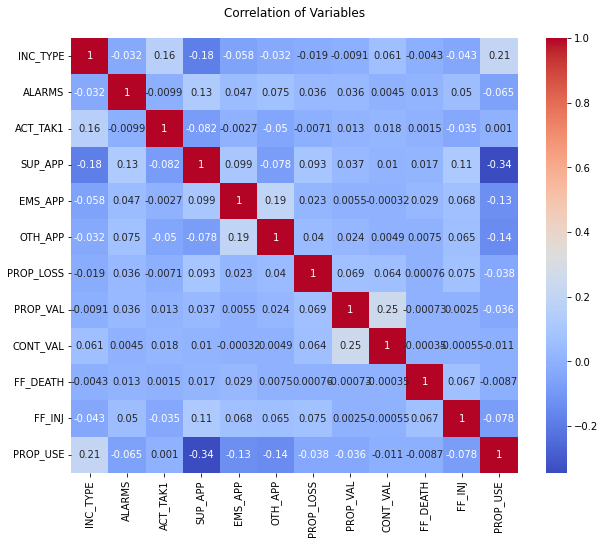


Variance Inflation Factors (VIF)

> 5: Multicollinearity Problem
> 10: Certain Multicollinearity among the variables

-------------------------------------
INC_TYPE: 1.0357801325290126
ALARMS: 1.2152413344094217
ACT_TAK1: 1.1606040288279584
SUP_APP: 1.203364687988705
EMS_APP: 1.9207152048867466
OTH_APP: 1.8358791296577757
PROP_VAL: 1.001695241408689
CONT_VAL: 1.0306339575290948
FF_DEATH: 7.270402615845755
FF_INJ: 1.802027971707151
PROP_USE: 6.71984341750493

2 cases of Problematic Multicollinearity
0 cases of Certain Multicollinearity



In [299]:
# In order to check for Multicollinearity , we will use VIF (Variance Inflation Factor) & also look for the correlations between the predictor variables as well.

feature_names = list(df_final.columns[0:])


# Plotting a Correlation Matrix Heatmap

print('\nCorrelation Heat Map')
print()
plt.figure(figsize = (10,8))
sns.heatmap(pd.DataFrame(df_final,columns=feature_names).corr(), annot=True,cmap='coolwarm')
plt.title('Correlation of Variables\n')
plt.show()

print()
print('Variance Inflation Factors (VIF)')
print()
print('> 5: Multicollinearity Problem')
print('> 10: Certain Multicollinearity among the variables')
print()
print('-------------------------------------')
    
# Calculate VIFs 

feat_names=X.columns[:]

VIF =[variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
for idx, vif in enumerate(VIF):
    print('{0}: {1}'.format(feat_names[idx], vif))
    
# Printing Total Cases of Possible or Definite Multicollinearity

problem_multicollinearity = sum([1 for vif in VIF if vif > 5])
certain_multicollinearity = sum([1 for vif in VIF if vif > 10])
print()
print('{0} cases of Problematic Multicollinearity'.format(problem_multicollinearity))
print('{0} cases of Certain Multicollinearity'.format(certain_multicollinearity))
print()


* **Only when the VIF for a variable is greater than 10 , there is a case of certain multicollinearity. We can see from the VIFs for the predictor variables that there are 0 cases of Certain Multicollinearity.**

* **Also when we take a look at the Correlation Heat Map , we don't see any predictor variables that are highly correlated with the remaining predictors.The highest magnitude for correlation coefficient is -0.34.**

* **Hence, we can conclude that there is no multicollinearity present amongst the predictor variables.** 

## Modeling: Fitting linear regressions models -  OLS, ridge, and lasso.



### **OLS Model : Statsmodels**

In [300]:
# Adding Constants X_train & X-test

X_train_c=sm.add_constant(X_train)
X_test_c=sm.add_constant(X_test,has_constant='add')

In [301]:
# Training the Model

statsmod=sm.OLS(y_train,X_train_c).fit()

In [302]:
# Storing the Predictions

train_preds_stats=statsmod.predict(X_train_c)

test_preds_stats=statsmod.predict(X_test_c)


In [303]:
# Summary

feature_names_c= list(X.columns[0:])
feature_names_c.insert(0, "constant")
print(statsmod.summary(xname=feature_names_c))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     474.9
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:52:57   Log-Likelihood:                -20602.
No. Observations:               13096   AIC:                         4.123e+04
Df Residuals:                   13084   BIC:                         4.132e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       9.4722      0.047    200.576      0.0

* R2

In [304]:
print("\nR2 for Training Set :",r2_score(y_train,train_preds_stats))
print("\nR2 for Test Set :",r2_score(y_test,test_preds_stats))


R2 for Training Set : 0.28532666078932534

R2 for Test Set : 0.2691329118069985


* MSE

In [305]:
print("\nMSE for Training Set :",mean_squared_error(y_train,train_preds_stats))
print("\nMSE for Test Set :",mean_squared_error(y_test,test_preds_stats))


MSE for Training Set : 1.3612750636576614

MSE for Test Set : 1.3979131538215939


* RMSE

In [306]:
print("\nRMSE for Training Set : ",rmse(y_train,train_preds_stats))
print("\nRMSE for Test Set : ",rmse(y_test,test_preds_stats))



RMSE for Training Set :  1.1667369299279342

RMSE for Test Set :  1.1823337742877829


### **OLS Model : Scikit-Learn**

In [307]:
# Training the Model

lr= LinearRegression()

lr=lr.fit(X_train,y_train)

In [308]:
# Storing the Predictions

train_preds_OLS=lr.predict(X_train)
test_preds_OLS=lr.predict(X_test)

* R2

In [309]:
print("\nR2 for Training Set :",r2_score(y_train,train_preds_OLS))
print("\nR2 for Test Set :",r2_score(y_test,test_preds_OLS))


R2 for Training Set : 0.28532666078932534

R2 for Test Set : 0.26913291180699783


* MSE

In [310]:
print("\nMSE for Training Set :",mean_squared_error(y_train,train_preds_OLS))
print("\nMSE for Test Set :",mean_squared_error(y_test,test_preds_OLS))


MSE for Training Set : 1.3612750636576614

MSE for Test Set : 1.3979131538215952


* RMSE

In [311]:
print("\nRMSE for Training Set : ",rmse(y_train,train_preds_OLS))
print("\nRMSE for Test Set : ",rmse(y_test,test_preds_OLS))


RMSE for Training Set :  1.1667369299279342

RMSE for Test Set :  1.1823337742877835


### **Ridge Model**

In [312]:
# Using Cross-Validation to find the best Alpha

ridgecv = RidgeCV(alphas=[0.0001,0.001, 0.01, 0.1, 0.5])
ridgecv.fit(X, y)
optimal = ridgecv.alpha_
print("From the above Alpha values, we see that" ,optimal, "is the optimal.") 

From the above Alpha values, we see that 0.5 is the optimal.


#### **We can conclude that among these Alpha values, 0.5 is the optimal value.**


In [313]:
# Training the Model with Optimal Alpha

ridge=Ridge(alpha=0.5)
ridge=ridge.fit(X_train,y_train)

In [314]:
# Storing the Predictions

train_preds_Ridge=ridge.predict(X_train)
test_preds_Ridge=ridge.predict(X_test)

* R2

In [315]:
print("\nR2 for Training Set :",r2_score(y_train,train_preds_Ridge))
print("\nR2 for Test Set :",r2_score(y_test,test_preds_Ridge))


R2 for Training Set : 0.28532666063537804

R2 for Test Set : 0.2691332129416424


* MSE

In [316]:
print("\nMSE for Training Set :",mean_squared_error(y_train,train_preds_Ridge))
print("\nMSE for Test Set :",mean_squared_error(y_test,test_preds_Ridge))


MSE for Training Set : 1.3612750639508928

MSE for Test Set : 1.3979125778480872


* RMSE

In [317]:
print("\nRMSE for Training Set : ",rmse(y_train,train_preds_Ridge))
print("\nRMSE for Test Set : ",rmse(y_test,test_preds_Ridge))


RMSE for Training Set :  1.1667369300535972

RMSE for Test Set :  1.1823335307129232


### **Lasso Model**

In [318]:
# Using Cross-Validation to find the best Alpha

lassocv = LassoCV(alphas=[0.0001,0.001, 0.01, 0.1, 0.5])
lassocv.fit(X, y)
optimal = lassocv.alpha_
print("From the above Alpha values, we see that" ,optimal, "is the optimal.") 
print('R2 is', lassocv.score(X,y))

From the above Alpha values, we see that 0.01 is the optimal.
R2 is 0.19471428912656297


#### **We can conclude that among these Alpha values, 0.01 is the optimal value.**

In [319]:
# Training the Model with Optimal Alpha

lasso=Lasso(alpha=0.01)
lasso=lasso.fit(X_train,y_train)

In [320]:
# Storing the Predictions

train_preds_Lasso=lasso.predict(X_train)
test_preds_Lasso=lasso.predict(X_test)

* R2

In [321]:
print("\nR2 for Training Set :",r2_score(y_train,train_preds_Lasso))
print("\nR2 for Test Set :",r2_score(y_test,test_preds_Lasso))


R2 for Training Set : 0.2850178529403643

R2 for Test Set : 0.26935654027180334


* MSE

In [322]:
print("\nMSE for Training Set :",mean_squared_error(y_train,train_preds_Lasso))
print("\nMSE for Test Set :",mean_squared_error(y_test,test_preds_Lasso))


MSE for Training Set : 1.3618632658490526

MSE for Test Set : 1.397485424652269


* RMSE

In [323]:
print("\nRMSE for Training Set : ",rmse(y_train,train_preds_Lasso))
print("\nRMSE for Test Set : ",rmse(y_test,test_preds_Lasso))


RMSE for Training Set :  1.1669889741762998

RMSE for Test Set :  1.182152877022371


## Evaluation: Calculating mean absolute error and median absolute error for train and test partition for each model.


### **OLS Model : Statsmodels**




* Mean Absolute Error

In [324]:
# Training Set

print("Mean Absolute Error for Training Set:",mean_absolute_error(y_train,train_preds_stats))

print(" ")

# Test Set

print("Mean Absolute Error for Test Set:",mean_absolute_error(y_test,test_preds_stats))

Mean Absolute Error for Training Set: 0.936473928251344
 
Mean Absolute Error for Test Set: 0.9540563685553937


* Median Absolute Error

In [325]:
# Training Set

print("Median Absolute Error for Training Set:",median_absolute_error(y_train,train_preds_stats))

print(" ")

# Test Set

print("Median Absolute Error for Test Set:",median_absolute_error(y_test,test_preds_stats))

Median Absolute Error for Training Set: 0.804380407970255
 
Median Absolute Error for Test Set: 0.8269714406374824


### **OLS Model : Scikit-Learn**

* Mean Absolute Error

In [326]:
# Training Set

print("Mean Absolute Error for Training Set:",mean_absolute_error(y_train,train_preds_OLS))

print(" ")

# Test Set

print("Mean Absolute Error for Test Set:",mean_absolute_error(y_test,test_preds_OLS))

Mean Absolute Error for Training Set: 0.9364739282513501
 
Mean Absolute Error for Test Set: 0.9540563685554007


* Median Absolute Error

In [327]:
# Training Set

print("Median Absolute Error for Training Set:",median_absolute_error(y_train,train_preds_OLS))

print(" ")

# Test Set

print("Median Absolute Error for Test Set:",median_absolute_error(y_test,test_preds_OLS))

Median Absolute Error for Training Set: 0.8043804079702586
 
Median Absolute Error for Test Set: 0.8269714406375481


### **Ridge Model**

* Mean Absolute Error

In [328]:
# Training Set

print("Mean Absolute Error for Training Set:",mean_absolute_error(y_train,train_preds_Ridge))

print(" ")

# Test Set

print("Mean Absolute Error for Test Set:",mean_absolute_error(y_test,test_preds_Ridge))

Mean Absolute Error for Training Set: 0.9364751992584306
 
Mean Absolute Error for Test Set: 0.9540576083695084


* Median Absolute Error

In [329]:
# Training Set

print("Median Absolute Error for Training Set:",median_absolute_error(y_train,train_preds_Ridge))

print(" ")

# Test Set

print("Median Absolute Error for Test Set:",median_absolute_error(y_test,test_preds_Ridge))

Median Absolute Error for Training Set: 0.8043650918547796
 
Median Absolute Error for Test Set: 0.8269819241312213


### **Lasso Model**

* Mean Absolute Error

In [330]:
# Training Set

print("Mean Absolute Error for Training Set:",mean_absolute_error(y_train,train_preds_Lasso))

print(" ")

# Test Set

print("Mean Absolute Error for Test Set:",mean_absolute_error(y_test,test_preds_Lasso))

Mean Absolute Error for Training Set: 0.9381008456184442
 
Mean Absolute Error for Test Set: 0.9553861968690024


* Median Absolute Error

In [331]:
# Training Set

print("Median Absolute Error for Training Set:",median_absolute_error(y_train,train_preds_Lasso))

print(" ")

# Test Set

print("Median Absolute Error for Test Set:",median_absolute_error(y_test,test_preds_Lasso))

Median Absolute Error for Training Set: 0.8091983802467624
 
Median Absolute Error for Test Set: 0.8309846800230858


* **We can see that for all 3 Models , the Median Absolute Error for the Training & Test Partitions is lower than the Mean Absolute Error.**

*  **Since the mean of absolute errors is affected by the extreme error values & median of absolute errors is not affected by extreme error values, we can say that the model is slightly affected by the presence of extreme evalues due to which we have extreme error values.**

* **This is the reason why we have a higher mean absolute error when compared to the median absolute error.**

## **Alternative : Using 5 Fold Cross-Validation**

In [332]:
# 5-Fold Cross-Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

folds = KFold(n_splits = 5, shuffle = True, random_state = 63)
X=scaler.fit_transform(X)
X=power.fit_transform(X)

### **OLS Model : Scikit-Learn**

In [333]:
r2_OLS=cross_val_score(lr,X,y,scoring='r2',cv=folds)
print("Average R2 :",np.mean(r2_OLS))
mse_OLS=cross_val_score(lr,X,y,scoring='neg_mean_squared_error',cv=folds)
print("Average MSE :",np.mean(abs(mse_OLS)))
print("Average RMSE :",np.sqrt(np.mean(abs(mse_OLS))))


# Absolute Errors

mean_abs_OLS=cross_val_score(lr,X,y,scoring='neg_mean_absolute_error',cv=folds)
print("Average Mean Absolute Error :",np.mean(abs(mean_abs_OLS)))
median_abs_OLS=cross_val_score(lr,X,y,scoring='neg_median_absolute_error',cv=folds)
print("Average Median Absolute Error :",np.mean(abs(median_abs_OLS)))

Average R2 : 0.28078850603153604
Average MSE : 1.3703016898036187
Average RMSE : 1.1705988594747643
Average Mean Absolute Error : 0.9393537692463088
Average Median Absolute Error : 0.8125756927670972


### **Ridge Model**

In [334]:
r2_ridge=cross_val_score(ridge,X,y,scoring='r2',cv=folds)
print("Average R2 :",np.mean(r2_ridge))
mse_ridge=cross_val_score(ridge,X,y,scoring='neg_mean_squared_error',cv=folds)
print("Average MSE :",np.mean(abs(mse_ridge)))
print("Average RMSE :",np.sqrt(np.mean(abs(mse_ridge))))

# Absolute Errors

mean_abs_ridge=cross_val_score(ridge,X,y,scoring='neg_mean_absolute_error',cv=folds)
print("Average Mean Absolute Error :",np.mean(abs(mean_abs_ridge)))
median_abs_ridge=cross_val_score(ridge,X,y,scoring='neg_median_absolute_error',cv=folds)
print("Average Median Absolute Error :",np.mean(abs(median_abs_ridge)))

Average R2 : 0.2807886020996774
Average MSE : 1.3703015241260856
Average RMSE : 1.1705987887086189
Average Mean Absolute Error : 0.9393550004893264
Average Median Absolute Error : 0.812568381778695


### **Lasso Model**

In [335]:
r2_lasso=cross_val_score(lasso,X,y,scoring='r2',cv=folds)
print("Average R2 :",np.mean(r2_lasso))
mse_lasso=cross_val_score(lasso,X,y,scoring='neg_mean_squared_error',cv=folds)
print("Average MSE :",np.mean(abs(mse_lasso)))
print("Average RMSE :",np.sqrt(np.mean(abs(mse_lasso))))

# Absolute Errors

mean_abs_lasso=cross_val_score(lasso,X,y,scoring='neg_mean_absolute_error',cv=folds)
print("Average Mean Absolute Error :",np.mean(abs(mean_abs_lasso)))
median_abs_lasso=cross_val_score(lasso,X,y,scoring='neg_median_absolute_error',cv=folds)
print("Average Median Absolute Error :",np.mean(abs(median_abs_lasso)))

Average R2 : 0.28059259534202274
Average MSE : 1.3706910594606228
Average RMSE : 1.1707651598252413
Average Mean Absolute Error : 0.9410571418601918
Average Median Absolute Error : 0.8164823312861337


## Evaluation: Calculating the baseline mean-only predictions and calculate both mean and median absolute error.

## **Training Partition** 

In [336]:
from statsmodels.tools.eval_measures import meanabs
from statsmodels.tools.eval_measures import medianabs

baseline_mean=np.mean(y_train)
print("Baseline Mean :",baseline_mean)
mean_abs_error=meanabs(baseline_mean,y_train)
print("Mean Absolute Error:",mean_abs_error)
median_abs_error=medianabs(baseline_mean,y_train)
print("Mean Absolute Error:",median_abs_error)

Baseline Mean : 9.226207765752829
Mean Absolute Error: 1.1218506086389426
Mean Absolute Error: 0.9773843792336372


## **Test Partition** 

In [337]:
baseline_mean=np.mean(y_test)
print("Baseline Mean :",baseline_mean)
mean_abs_error=meanabs(baseline_mean,y_test)
print("Mean Absolute Error:",mean_abs_error)
median_abs_error=medianabs(baseline_mean,y_test)
print("Mean Absolute Error:",median_abs_error)

Baseline Mean : 9.21266329967102
Mean Absolute Error: 1.1318066965223958
Mean Absolute Error: 1.0521450521935147


## Evaluation: Scatterplots of `x=Actual` and `y=Pred` for each model



### **OLS Model : Scikit-Learn**

* Training Set

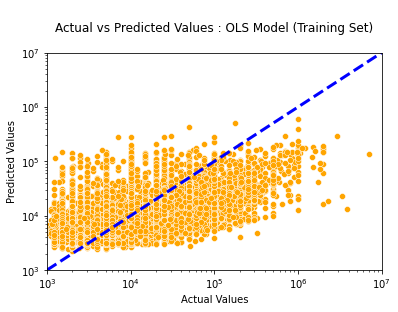

In [338]:
sns.scatterplot(x=np.exp(y_train),y=np.exp(train_preds_OLS),color='orange')
plt.xscale('log') 
plt.yscale('log') 
plt.xlim([1E3,1E7])
plt.ylim([1E3,1E7])
xpoints=ypoints=plt.xlim()
plt.plot(xpoints,ypoints,linestyle='--',color='blue',lw=3,scalex=False,scaley=False)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("\nActual vs Predicted Values : OLS Model (Training Set)\n")
plt.show()

* Test Set

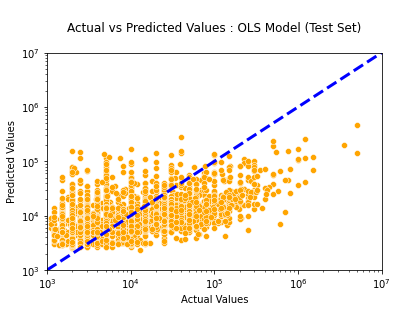

In [339]:
sns.scatterplot(x=np.exp(y_test),y=np.exp(test_preds_OLS),color='orange')
plt.xscale('log') 
plt.yscale('log') 
plt.xlim([1E3,1E7])
plt.ylim([1E3,1E7])
xpoints=ypoints=plt.xlim()
plt.plot(xpoints,ypoints,linestyle='--',color='blue',lw=3,scalex=False,scaley=False)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("\nActual vs Predicted Values : OLS Model (Test Set)\n")
plt.show()

### **Ridge Model**

* Training Set

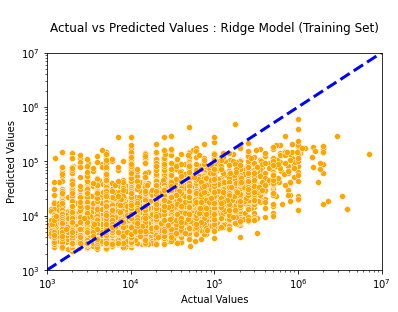

In [340]:
sns.scatterplot(x=np.exp(y_train),y=np.exp(train_preds_Ridge),color='orange')
plt.xscale('log') 
plt.yscale('log') 
plt.xlim([1E3,1E7])
plt.ylim([1E3,1E7])
xpoints=ypoints=plt.xlim()
plt.plot(xpoints,ypoints,linestyle='--',color='blue',lw=3,scalex=False,scaley=False)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("\nActual vs Predicted Values : Ridge Model (Training Set)\n")
plt.show()

* Test Set

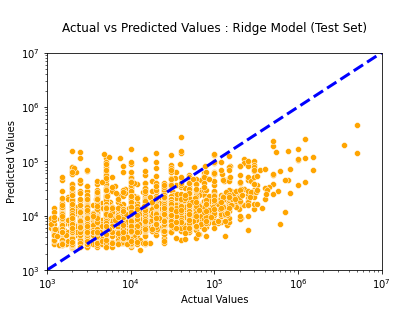

In [341]:
sns.scatterplot(x=np.exp(y_test),y=np.exp(test_preds_Ridge),color='orange')
plt.xscale('log') 
plt.yscale('log') 
plt.xlim([1E3,1E7])
plt.ylim([1E3,1E7])
xpoints=ypoints=plt.xlim()
plt.plot(xpoints,ypoints,linestyle='--',color='blue',lw=3,scalex=False,scaley=False)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("\nActual vs Predicted Values : Ridge Model (Test Set)\n")
plt.show()

### **Lasso Model**

* Training Set

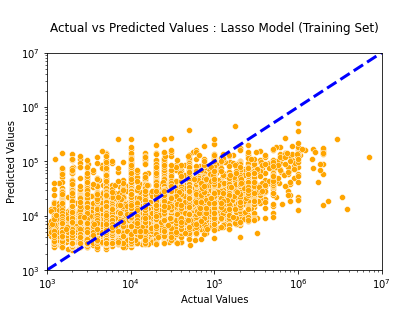

In [342]:
sns.scatterplot(x=np.exp(y_train),y=np.exp(train_preds_Lasso),color='orange')
plt.xscale('log') 
plt.yscale('log') 
plt.xlim([1E3,1E7])
plt.ylim([1E3,1E7])
xpoints=ypoints=plt.xlim()
plt.plot(xpoints,ypoints,linestyle='--',color='blue',lw=3,scalex=False,scaley=False)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("\nActual vs Predicted Values : Lasso Model (Training Set)\n")
plt.show()

* Test Set

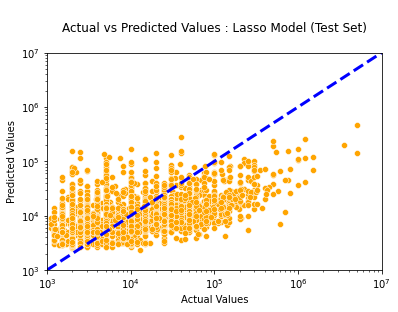

In [343]:
sns.scatterplot(x=np.exp(y_test),y=np.exp(test_preds_Ridge),color='orange')
plt.xscale('log') 
plt.yscale('log') 
plt.xlim([1E3,1E7])
plt.ylim([1E3,1E7])
xpoints=ypoints=plt.xlim()
plt.plot(xpoints,ypoints,linestyle='--',color='blue',lw=3,scalex=False,scaley=False)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("\nActual vs Predicted Values : Lasso Model (Test Set)\n")
plt.show()

## About the Models

* ***The predictor variables used for modeling have values in different ranges / scales , & hence the models' predictions were skewed initially since the predictor variables having values with a larger scale had a stronger influence on the model.We then standardized the variables to fix this problem.***

* ***The predictor variables (numeric variables) used for modeling did not follow a Normal Distribution and this affected the model's performance. Transforming the distribution of the variables using Power Transformer helped to improve the R2 values for the models significantly.***

* ***From the Summary Table for OLS model, we see that there are predictor variables having p-values greater than 0.05. Instead of dropping these variables, we have used these variables for modeling which has impacted the model's performance.***

* ***We can see from the correlation heat map that none of the predictor variables have a strong correlation with the target variable 'PROP_LOSS' . Hence, we haven't been able to capture too much variance using the 11 Predictor Variables used in the subset. That is why the R2 values for all 3 models are found to be less than 0.3 for Test Set.Hence,more variables will have to incorporated into the model to capture more variance & improve the R2 values.***

* ***The R2 values for test set is comparable to R2 values for the training set for all 3 models. Hence , we can say that these models are not overfitting. So, although the predictive power for the models is not great, we can still categorize these models as 'good'.***


# **Random Forest Model**

* ***To improve the prediction power , we have tried the Random Forest Model as well.***

* ***We got the highest R2 value for the Random Forest Model , with an R2 value of 0.55 for the Training Partition & 0.52 for the Test Partition.***

* ***The Mean Absolute Errorr & Median Absolute errors were also found to be the lowest for the Random Forest Model.***

In [344]:
# Training the Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

random_for= RandomForestRegressor(n_estimators=7,max_depth= 10,max_features= 'sqrt', min_samples_leaf= 15,
 min_samples_split= 2,random_state = 63)

random_for=random_for.fit(X_train,y_train)


# Finding the Best Parameters for Random Forest Model

# parameters = {
#     'max_depth': [10,15,20],
#     'n_estimators': [7,8,9,10],
#     'min_samples_leaf': [10,12,15],
#  'min_samples_split': [1,2,5],
# }
# random_grid = GridSearchCV(random_for, parameters, cv = 3, n_jobs = -1, verbose = 1)
# random_grid.fit(X_train, y_train)
# random_grid.best_params_


# The Best Parameters for the model :

# {'max_depth': 10,
#  'min_samples_leaf': 15,
#  'min_samples_split': 2,
#  'n_estimators': 7}


In [345]:
# Storing the Predictions

train_preds_Random=random_for.predict(X_train)
test_preds_Random=random_for.predict(X_test)

* R2

In [346]:
print("\nR2 for Training Set :",r2_score(y_train,train_preds_Random))
print("\nR2 for Test Set :",r2_score(y_test,test_preds_Random))


R2 for Training Set : 0.5568069832650973

R2 for Test Set : 0.5219504462585403


* MSE

In [347]:
print("\nMSE for Training Set :",mean_squared_error(y_train,train_preds_Random))
print("\nMSE for Test Set :",mean_squared_error(y_test,test_preds_Random))


MSE for Training Set : 0.8441725316558786

MSE for Test Set : 0.9143547029952698


* RMSE

In [348]:
print("\nRMSE for Training Set : ",rmse(y_train,train_preds_Random))
print("\nRMSE for Test Set : ",rmse(y_test,test_preds_Random))


RMSE for Training Set :  0.9187886218580847

RMSE for Test Set :  0.9562189618467466


* Mean Absolute Error

In [349]:
print("Mean Absolute Error for Training Set:",mean_absolute_error(y_train,train_preds_Random))

print(" ")

# Test Set

print("Mean Absolute Error for Test Set:",mean_absolute_error(y_test,test_preds_Random))

Mean Absolute Error for Training Set: 0.6437580660517421
 
Mean Absolute Error for Test Set: 0.6736634677561871


* Median Absolute Error

In [350]:
# Training Set

print("Median Absolute Error for Training Set:",median_absolute_error(y_train,train_preds_Random))

print(" ")

# Test Set

print("Median Absolute Error for Test Set:",median_absolute_error(y_test,test_preds_Random))

Median Absolute Error for Training Set: 0.40406920167982285
 
Median Absolute Error for Test Set: 0.43509850381930804


### **Evaluation Using Cross-Validation**

In [351]:
r2_random_for=cross_val_score(random_for,X,y,scoring='r2',cv=folds)
print("Average R2 :",np.mean(r2_random_for))
mse_random_for=cross_val_score(random_for,X,y,scoring='neg_mean_squared_error',cv=folds)
print("Average MSE :",np.mean(abs(mse_random_for)))
print("Average RMSE :",np.sqrt(np.mean(abs(mse_random_for))))

# Absolute Errors

mean_abs_random_for=cross_val_score(random_for,X,y,scoring='neg_mean_absolute_error',cv=folds)
print("Average Mean Absolute Error :",np.mean(abs(mean_abs_random_for)))
median_abs_random_for=cross_val_score(random_for,X,y,scoring='neg_median_absolute_error',cv=folds)
print("Average Median Absolute Error :",np.mean(abs(median_abs_random_for)))

Average R2 : 0.516098968321921
Average MSE : 0.9218678917843637
Average RMSE : 0.9601395168330297
Average Mean Absolute Error : 0.6889695813639537
Average Median Absolute Error : 0.455181423761716


### Baseline Mean - Mean Absolute Error & Median Absolute Error

* Training Partition

In [352]:
baseline_mean=np.mean(train_preds_Random)
print("Baseline Mean :",baseline_mean)
mean_abs_error=meanabs(baseline_mean,train_preds_Random)
print("Mean Absolute Error:",mean_abs_error)
median_abs_error=medianabs(baseline_mean,train_preds_Random)
print("Mean Absolute Error:",median_abs_error)

Baseline Mean : 9.224864261064933
Mean Absolute Error: 0.763520276537396
Mean Absolute Error: 0.6576440887926323


* Test Partition

In [353]:
baseline_mean=np.mean(test_preds_Random)
print("Baseline Mean :",baseline_mean)
mean_abs_error=meanabs(baseline_mean,test_preds_Random)
print("Mean Absolute Error:",mean_abs_error)
median_abs_error=medianabs(baseline_mean,test_preds_Random)
print("Mean Absolute Error:",median_abs_error)

Baseline Mean : 9.200058337098936
Mean Absolute Error: 0.7587196533141426
Mean Absolute Error: 0.6554456429238122


## Scatter Plot : Actual vs Predicted Values

* Training Partition

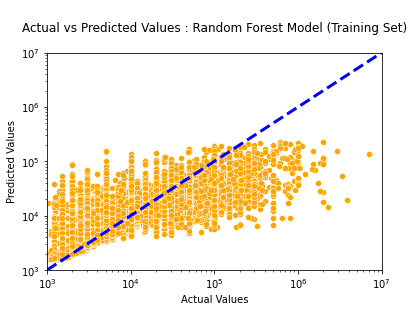

In [354]:
sns.scatterplot(x=np.exp(y_train),y=np.exp(train_preds_Random),color='orange')
plt.xscale('log') 
plt.yscale('log') 
plt.xlim([1E3,1E7])
plt.ylim([1E3,1E7])
xpoints=ypoints=plt.xlim()
plt.plot(xpoints,ypoints,linestyle='--',color='blue',lw=3,scalex=False,scaley=False)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("\nActual vs Predicted Values : Random Forest Model (Training Set)\n")
plt.show()

* Test Partition

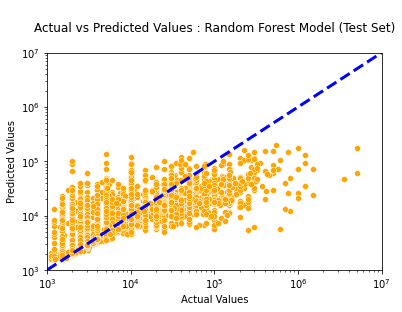

In [355]:
sns.scatterplot(x=np.exp(y_test),y=np.exp(test_preds_Random),color='orange')
plt.xscale('log') 
plt.yscale('log') 
plt.xlim([1E3,1E7])
plt.ylim([1E3,1E7])
xpoints=ypoints=plt.xlim()
plt.plot(xpoints,ypoints,linestyle='--',color='blue',lw=3,scalex=False,scaley=False)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("\nActual vs Predicted Values : Random Forest Model (Test Set)\n")
plt.show()